In [1]:
import pathlib

import cv2
import matplotlib.pyplot as plt
import numpy as np

IMG_DIR = pathlib.Path("images/")

In [2]:
img_gray = cv2.imread(str(IMG_DIR / "Albert_Einstein.jpg"), cv2.IMREAD_GRAYSCALE)
img_bgr = cv2.imread(str(IMG_DIR / "tulips.jpg"))

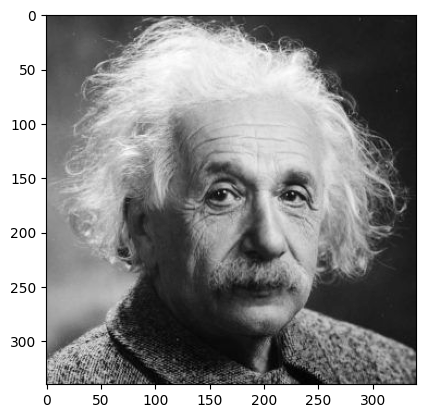

In [3]:
plt.imshow(img_gray, cmap="grey")
plt.show()

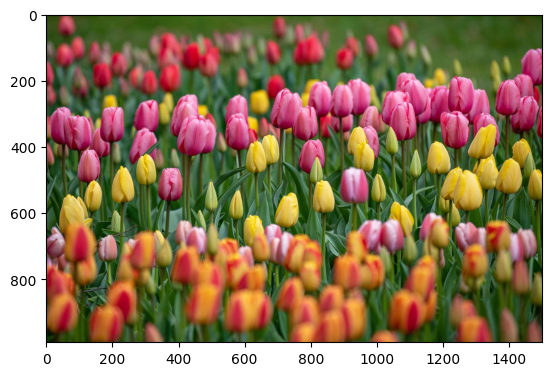

In [4]:
plt.imshow(img_bgr[..., ::-1])
plt.show()

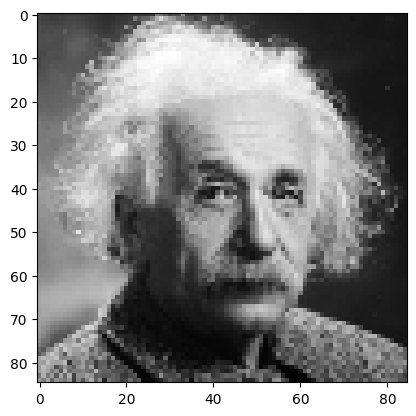

In [5]:
img_gray_resized = cv2.resize(img_gray, fx=0.25, fy=0.25, dsize=None)
plt.imshow(img_gray_resized, cmap="grey")
plt.show()

In [6]:
P = np.array((2, 4))
Sx, Sy = 3, 0.5

S = np.array(((Sx, 0), (0, Sy)))
S, S @ P

(array([[3. , 0. ],
        [0. , 0.5]]),
 array([6., 2.]))

In [7]:
P = np.array((2, 4, 8))
S = np.array(((2, 0, 0), (0, 2, 0), (0, 0, 2)))

S @ P

array([ 4,  8, 16])

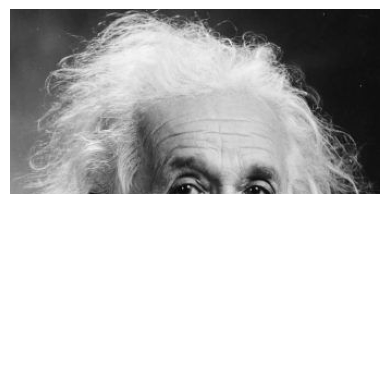

In [8]:
img_gray_copy = np.ones_like(img_gray) * 255  # type: ignore

rows, cols = img_gray_copy.shape
for row in range(rows // 2):
    for col in range(cols):
        img_gray_copy[row, col] = img_gray[row, col]

plt.imshow(img_gray_copy, cmap="gray")
plt.axis("off")
plt.show()

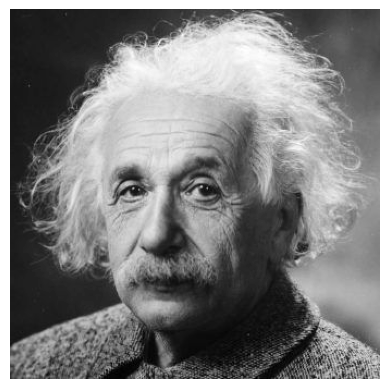

In [9]:
img_gray_copy = np.zeros_like(img_gray)
img_gray_copy = img_gray[:, ::-1]
plt.imshow(img_gray_copy, cmap="gray")
plt.axis("off")
plt.show()

In [10]:
def bilinear_interpolate(row, col, img):
    left_col, right_col = int(col), int(col) + 1
    top_row, bottom_row = int(row), int(row) + 1

    weight_right = col - left_col
    weight_left = right_col - col

    weight_top = bottom_row - row
    weight_bottom = row - top_row

    if not (top_row >= 0 and bottom_row < img.shape[0] and left_col >= 0 and right_col < img.shape[1]):
        return 0
    
    a = weight_left * img[top_row, left_col] + weight_right * img[top_row, right_col]
    b = weight_left * img[bottom_row, left_col] + weight_right * img[bottom_row, right_col]

    g = weight_top * a + weight_bottom * b
    return np.uint8(g)

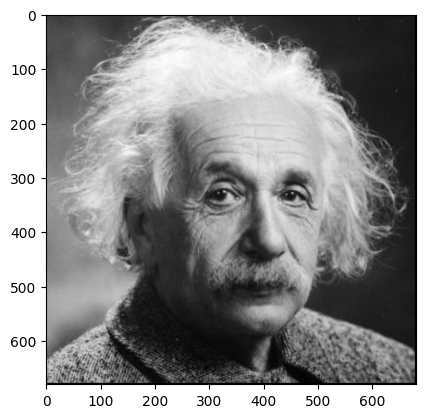

In [11]:
S = np.array([[2, 0], [0, 2]])
S_inv = np.linalg.inv(S)

rows, cols = img_gray.shape
img2 = np.zeros((2 * rows, 2 * cols), dtype=np.uint8)

for new_i in range(img2.shape[0]):
    for new_j in range(img2.shape[1]):
        new_p = np.array([new_i, new_j])
        P = S_inv @ new_p
        i, j = P
        if 0 <= i < rows and 0 <= j < cols:
            img2[new_i, new_j] = bilinear_interpolate(i, j, img_gray)

plt.imshow(img2, cmap="gray")
plt.show()

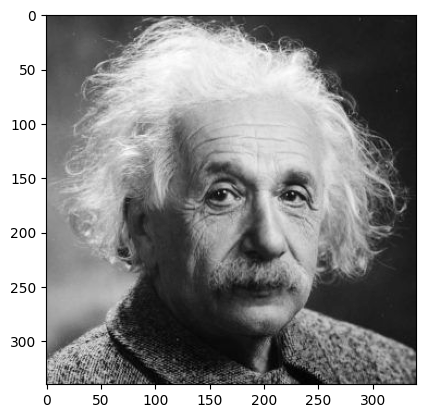

In [12]:
einstein_img = cv2.imread(str(IMG_DIR / "Albert_Einstein.jpg"), cv2.IMREAD_GRAYSCALE)
plt.imshow(einstein_img, cmap="gray")
plt.show()

In [13]:
def scale_img(scale_vector, img):
    scale_matrix = np.eye(2, 2) * scale_vector

    rows, cols = img.shape
    sx, sy = scale_matrix[0, 0], scale_matrix[1, 1]
    new_img = np.zeros((int(sx * rows), int(sy * cols)), dtype=np.uint8)
    scale_matrix_inv = np.linalg.inv(scale_matrix)

    for new_i in range(new_img.shape[0]):
        for new_j in range(new_img.shape[1]):
            new_p = np.array((new_i, new_j))
            i, j = scale_matrix_inv @ new_p
            if 0 <= i < rows and 0 <= j < cols:
                new_img[new_i, new_j] = bilinear_interpolate(i, j, img)

    return new_img

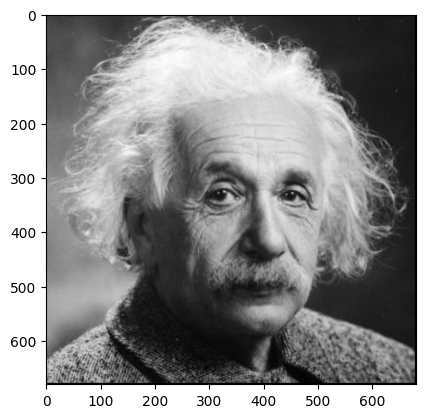

In [14]:
img_new = scale_img((2, 2), einstein_img)
plt.imshow(img_new, cmap="gray")
plt.show()

In [15]:
tulips_b = img_bgr[..., 0]
tulips_g = img_bgr[..., 1]
tulips_r = img_bgr[..., 2]

tulips_b_scaled = scale_img((2, 2), tulips_b)
tulips_g_scaled = scale_img((2, 2), tulips_g)
tulips_r_scaled = scale_img((2, 2), tulips_r)

tulips_scaled = np.stack((tulips_b_scaled, tulips_g_scaled, tulips_r_scaled), axis=2)

In [19]:
img_bgr.shape, tulips_scaled.shape

((991, 1500, 3), (1982, 3000, 3))

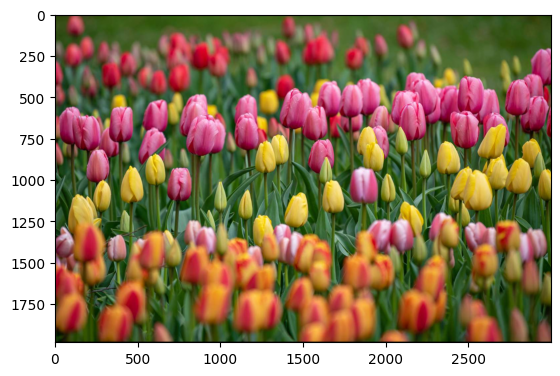

In [16]:
plt.imshow(tulips_scaled[..., ::-1])
plt.show()